In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
df = pd.read_excel("happiness.xlsx")
df

,Country,Region,Happiness,Economy,Family,Health,Freedom,Trust,Generosity
0,Switzerland,Western Europe,7.587,1.40,1.35,0.94,0.67,0.42,0.30
1,Iceland,Western Europe,7.561,1.30,1.40,0.95,0.63,0.14,0.44
2,Denmark,Western Europe,7.527,1.33,1.36,0.87,0.65,0.48,0.34
3,Norway,Western Europe,7.522,1.46,1.33,0.89,0.67,0.37,0.35
4,Canada,North America,7.427,1.33,1.32,0.91,0.63,0.33,0.46
...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,3.465,0.22,0.77,0.43,0.59,0.55,0.23
154,Benin,Sub-Saharan Africa,3.340,0.29,0.35,0.32,0.48,0.08,0.18
155,Syria,Middle East and Northern Africa,3.006,0.66,0.47,0.72,0.16,0.19,0.47
156,Burundi,Sub-Saharan Africa,2.905,0.02,0.42,0.22,0.12,0.10,0.20


In [13]:
mean_freedom = df['Freedom'].mean()
std_dev_freedom = df['Freedom'].std()

mean_freedom = round(mean_freedom, 2)
std_dev_freedom = round(std_dev_freedom, 2)

print("Среднее значение Freedom:", mean_freedom)
print("Стандартное отклонение Freedom:", std_dev_freedom)

Среднее значение Freedom: 0.43
Стандартное отклонение Freedom: 0.15


In [14]:
latin_america_df = df[df['Region'] == 'Latin America and Caribbean']

mean_freedom_latin_america = latin_america_df['Freedom'].mean()

mean_freedom_latin_america = round(mean_freedom_latin_america, 2)

print("Среднее значение Freedom для стран региона Latin America and Caribbean:", mean_freedom_latin_america)

Среднее значение Freedom для стран региона Latin America and Caribbean: 0.5


In [15]:
df['Freedom or Family'] = df.apply(lambda row: row['Freedom'] if row['Freedom'] > row['Family'] else row['Family'],
								   axis = 1)

median_freedom_or_family = df['Freedom or Family'].median()

median_freedom_or_family = round(median_freedom_or_family, 2)

print("Медиана значений в столбце Freedom or Family:", median_freedom_or_family)


Медиана значений в столбце Freedom or Family: 1.03


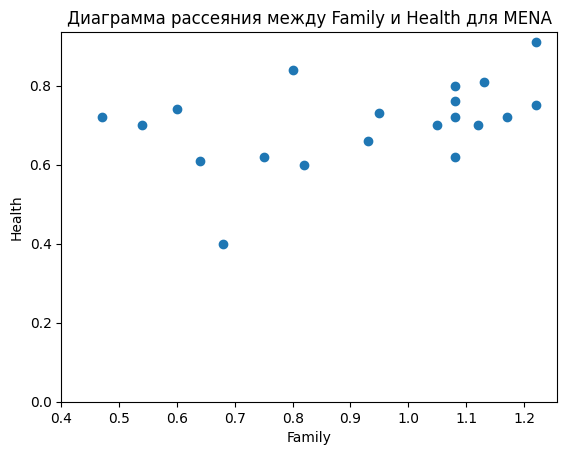

In [18]:
mena_df = df[df['Region'] == 'Middle East and Northern Africa']

plt.scatter(mena_df['Family'], mena_df['Health'])
plt.title('Диаграмма рассеяния между Family и Health для MENA')
plt.xlabel('Family')
plt.ylabel('Health')
plt.xlim(0.4)
plt.ylim(0)

plt.show()

In [19]:
numeric_features = ['Happiness', 'Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity']

std_deviations = df[numeric_features].std()

min_std_deviation_variable = std_deviations.idxmin()

min_std_deviation_value = round(std_deviations[min_std_deviation_variable], 2)

print("Переменная с наименьшим стандартным отклонением:", min_std_deviation_variable)
print("Соответствующее значение стандартного отклонения:", min_std_deviation_value)


Переменная с наименьшим стандартным отклонением: Trust
Соответствующее значение стандартного отклонения: 0.12


In [20]:
pivot_table_family = pd.pivot_table(df, values = 'Family', index = 'Region', aggfunc = 'mean')

min_avg_family_region = pivot_table_family.idxmin()
min_avg_family_value = round(pivot_table_family.min(), 2)

print("Регион с наименьшим средним значением признака Family:", min_avg_family_region)
print("Соответствующее среднее значение (округленное до двух знаков):", min_avg_family_value)


Регион с наименьшим средним значением признака Family: Family    Southern Asia
dtype: object
Соответствующее среднее значение (округленное до двух знаков): Family    0.64
dtype: float64


In [22]:
correlation_features = ['Happiness', 'Economy', 'Family', 'Health', 'Trust', 'Generosity']

correlations = df[correlation_features].corrwith(df['Freedom'])

max_corr_feature = correlations.idxmax()
max_corr_value = round(correlations[max_corr_feature], 2)

print("Признак с наибольшей корреляцией с Freedom:", max_corr_feature)
print("Соответствующее значение корреляции (округленное до двух знаков):", max_corr_value)


Признак с наибольшей корреляцией с Freedom: Happiness
Соответствующее значение корреляции (округленное до двух знаков): 0.57
